</span>

# <span style="color:Green">Комментарий от наставника</span>

Привет, меня зовут Дмитрий. Я наставник в твоей группе. Мои комментарии - <span style="color:DarkGreen">**зеленого**</span> цвета. Немного правил и пожеланий по ним:
- комментарии предваряются временной меткой формата **YYYY-MM-DD** для отслеживания их хронологии и легкого поиска,
- **частные** комментарии, если есть, размещаются в теле самого проекта и относятся к ячейкам, которые находятся выше них,
- **общий** комментарий я помещаю в самом начале проекта, т.е. в данной ячейке (чуть ниже),
- пожалуйста, **не удаляй** мои комментарии, они мне бывают полезны при повторной проверке.

---

<span style="color:Green">

**2019-11-10 DD**

Поздравляю со знакомством с ML. Поехали...

Проект проверил, он у тебя получился хорошо, критических замечаний нет, принимается.

Факультативно, если есть время, то попробуй посчитать ещё ROC AUC для каждого классификатора (см. https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score и другие ссылки по ключевым словам), это более хитрая метрика оценки качества бинарного классификатора, которая учитывает его качество в большей степени, чем просто accuracy. Если ты ещё и выведешь ROC curve для каждого классификатора (на одном графике), проинтерпретируешь, то будет просто великолепно. Я пишу об этом, т.к. ROC curve - классика оценки качества бинарного классификатора, о нёй часто спрашивают на собеседованиях.

</span>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## 1. Откройте и изучите файл

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pathlib import Path
path = Path.cwd()

In [4]:
df = pd.read_csv('{}/datasets/users_behavior.csv'.format(path))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3214 non-null   int64  
 1   calls       3214 non-null   float64
 2   minutes     3214 non-null   float64
 3   messages    3214 non-null   float64
 4   mb_used     3214 non-null   float64
 5   is_ultra    3214 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 150.8 KB


все поля заполнены, уже неплохо

In [5]:
df.describe()

,Unnamed: 0,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1606.500000,63.038892,438.208787,38.281269,17207.673836,0.306472
std,927.946209,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,803.250000,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,1606.500000,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,2409.750000,82.000000,571.927500,57.000000,21424.700000,1.000000
max,3213.000000,244.000000,1632.060000,224.000000,49745.730000,1.000000


* средний профиль: 60 звонков, 430 минут, 30 СМС, 17Гб(!)
* 30% пользователей на тарифе Ультра
* среднее от медианы отличвается только для СМС

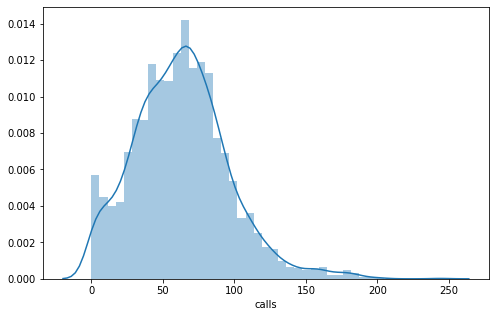

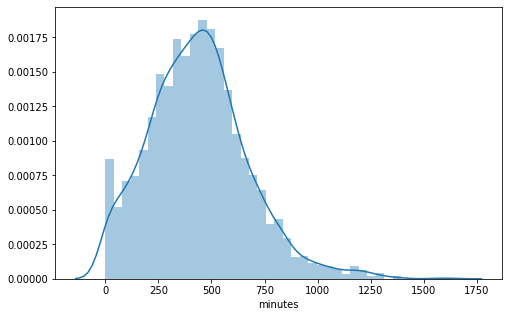

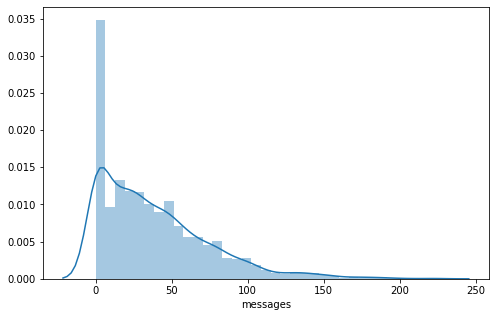

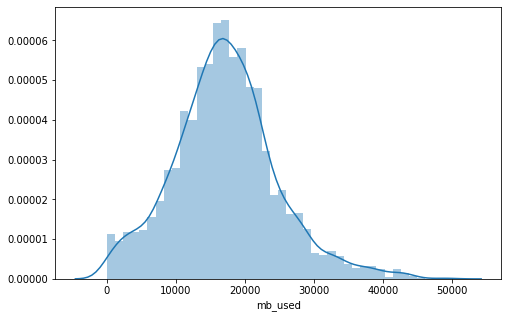

In [6]:
for param in ['calls', 'minutes', 'messages', 'mb_used']:
    fig, ax = plt.subplots(figsize=(8,5))
    sns.distplot(df[param])

как и ожидалось распределение для СМС завалено влево, многие вообще не пользуются СМС

<span style="color:Green">

**2019-11-10 DD**

"Посмотреть" на данные инструментами EDA - хорошая практика перед построением моделей. Хорошо, что ты попробовал оценить с какими данными требуется иметь дело.

</span>

## 2. Разбейте данные на выборки

Разбить данные нужно на три выборки: тренировочную, тестовую и валидационную в соотношении 3:1:1

In [7]:
df_train_test, df_valid = train_test_split(df, test_size = 0.2, random_state=12345)
df_train, df_test = train_test_split(df_train_test, test_size = 0.25, random_state=12345)
print(df_train.shape)
print(df_test.shape)
print(df_valid.shape)

(1928, 6)
(643, 6)
(643, 6)


разобьём выборки на feature и target

In [8]:
train_feature = df_train.drop('is_ultra', axis=1)
train_target = df_train['is_ultra']

valid_feature = df_valid.drop('is_ultra', axis=1)
valid_target = df_valid['is_ultra']

test_feature = df_test.drop('is_ultra', axis=1)
test_target = df_test['is_ultra']

## 3. Исследуйте модели

Перед нами задача классификации. Попробуем решить её с помощью 
* Decision Tree
* Random Forest
* Logistic Regression

#### Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1, 12, 1):
    model = DecisionTreeClassifier(random_state=54321, max_depth=i)
    # обучение модели
    model.fit(train_feature, train_target)
    # предсказание валидационной выборки
    predictions = model.predict(valid_feature)
    # расчет точности
    accuracy = accuracy_score(valid_target, predictions)
    print('Модель Decision Tree, max_depth=', i, ', accuracy:', accuracy)

Модель Decision Tree, max_depth= 1 , accuracy: 0.7480559875583204
Модель Decision Tree, max_depth= 2 , accuracy: 0.7838258164852255
Модель Decision Tree, max_depth= 3 , accuracy: 0.7869362363919129
Модель Decision Tree, max_depth= 4 , accuracy: 0.7869362363919129
Модель Decision Tree, max_depth= 5 , accuracy: 0.7869362363919129
Модель Decision Tree, max_depth= 6 , accuracy: 0.7869362363919129
Модель Decision Tree, max_depth= 7 , accuracy: 0.7744945567651633
Модель Decision Tree, max_depth= 8 , accuracy: 0.776049766718507
Модель Decision Tree, max_depth= 9 , accuracy: 0.7807153965785381
Модель Decision Tree, max_depth= 10 , accuracy: 0.7744945567651633
Модель Decision Tree, max_depth= 11 , accuracy: 0.7682737169517885


Добавим цикл по гиперпараметру min_sample_leaf

In [10]:
for i in range(5, 8, 1):
    for j in range(1, 10, 2):
        model = DecisionTreeClassifier(random_state=54321, max_depth=i, min_samples_leaf=j)
        # обучение модели
        model.fit(train_feature, train_target)
        # предсказание валидационной выборки
        predictions = model.predict(valid_feature)
        # расчет точности
        accuracy = accuracy_score(valid_target, predictions)
        print('Модель Decision Tree, max_depth=', i, ', min_samples_leaf=',j,', accuracy:', accuracy)

Модель Decision Tree, max_depth= 5 , min_samples_leaf= 1 , accuracy: 0.7869362363919129
Модель Decision Tree, max_depth= 5 , min_samples_leaf= 3 , accuracy: 0.7916018662519441
Модель Decision Tree, max_depth= 5 , min_samples_leaf= 5 , accuracy: 0.7869362363919129
Модель Decision Tree, max_depth= 5 , min_samples_leaf= 7 , accuracy: 0.7884914463452566
Модель Decision Tree, max_depth= 5 , min_samples_leaf= 9 , accuracy: 0.7900466562986003
Модель Decision Tree, max_depth= 6 , min_samples_leaf= 1 , accuracy: 0.7869362363919129
Модель Decision Tree, max_depth= 6 , min_samples_leaf= 3 , accuracy: 0.7962674961119751
Модель Decision Tree, max_depth= 6 , min_samples_leaf= 5 , accuracy: 0.7931570762052877
Модель Decision Tree, max_depth= 6 , min_samples_leaf= 7 , accuracy: 0.7947122861586314
Модель Decision Tree, max_depth= 6 , min_samples_leaf= 9 , accuracy: 0.7962674961119751
Модель Decision Tree, max_depth= 7 , min_samples_leaf= 1 , accuracy: 0.7744945567651633
Модель Decision Tree, max_depth=

#### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

for i in range(1, 5, 1):
    for j in range(5, 30, 5):
        model = RandomForestClassifier(random_state=54321, n_estimators=j, max_features = i)
        # обучение модели
        model.fit(train_feature, train_target)
        # предсказание валидационной выборки
        predictions = model.predict(valid_feature)
        # расчет точности
        accuracy = accuracy_score(valid_target, predictions)
        print('Модель Random Forest, max_features=', i,' n_estimators=', j, ', accuracy:', accuracy)

Модель Random Forest, max_features= 1  n_estimators= 5 , accuracy: 0.7480559875583204
Модель Random Forest, max_features= 1  n_estimators= 10 , accuracy: 0.7791601866251944
Модель Random Forest, max_features= 1  n_estimators= 15 , accuracy: 0.776049766718507
Модель Random Forest, max_features= 1  n_estimators= 20 , accuracy: 0.7869362363919129
Модель Random Forest, max_features= 1  n_estimators= 25 , accuracy: 0.7838258164852255
Модель Random Forest, max_features= 2  n_estimators= 5 , accuracy: 0.7667185069984448
Модель Random Forest, max_features= 2  n_estimators= 10 , accuracy: 0.7853810264385692
Модель Random Forest, max_features= 2  n_estimators= 15 , accuracy: 0.7807153965785381
Модель Random Forest, max_features= 2  n_estimators= 20 , accuracy: 0.7822706065318819
Модель Random Forest, max_features= 2  n_estimators= 25 , accuracy: 0.7838258164852255
Модель Random Forest, max_features= 3  n_estimators= 5 , accuracy: 0.7744945567651633
Модель Random Forest, max_features= 3  n_estima

#### Logical Regression

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=54321)
# обучение модели
model.fit(train_feature, train_target)
# предсказание валидационной выборки
predictions = model.predict(valid_feature)
# расчет точности
accuracy = accuracy_score(valid_target, predictions)
print('Модель Logistic Regression, accuracy:', accuracy)

Модель Logistic Regression, accuracy: 0.6936236391912908


Лучшие результаты по моделям:
* Модель Decision Tree, max_depth= 5 , min_samples_leaf= 3 , accuracy: 0.7931570762052877
* Модель Random Forest, max_features= 1  n_estimators= 20 , accuracy: 0.80248833592535
* Модель Logistic Regression, accuracy: 0.702954898911353

#### Побеждает Random Forest!
* Из трёх моделей самый плохой результат показала логистическая регрессия, решающее дерево отстало от леса не сильно
* Построение модели леса шло явно медленнее, но в нашем случае это не критично

<span style="color:Green">

**2019-11-10 DD**

Ожидаемые результаты, т.к. RF - самая гибкая модель из этих трех. Обычно на практике так и бывает, но у DT и LR тоже есть свои преимущества. Их, как минимум, гораздо легче интерпретировать.

</span>

## 4. Проверьте модель на тестовой выборке

In [13]:
model = RandomForestClassifier(random_state=54321, n_estimators=20, max_features=1)
# обучение модели
model.fit(train_feature, train_target)
# предсказание тестовой выборки
test_predictions = model.predict(test_feature)
# расчет точности
accuracy = accuracy_score(test_target, test_predictions)
print('Accuracy для тестовой выборки:', accuracy)

Accuracy для тестовой выборки: 0.7884914463452566


### Ура! Больше 0.75!

## 5. (бонус) Проверьте модели на адекватность

Как можно проверить модель на адекватность:
* в исходных данных доля тарифа Ультра была 30%. Можно посмотреть долю тарифа Ультра в тестовой выборке

In [14]:
s = pd.Series(test_predictions)
s.value_counts(normalize=True)

0    0.807154
1    0.192846
dtype: float64

In [15]:
test_target.value_counts(normalize=True)

0    0.688958
1    0.311042
Name: is_ultra, dtype: float64

В тестовых данных доля Ультры 31%, а в предсказании только 21%. Похоже что наша модель склонна предлагать тариф Смарт :(

Возможно это из-за того, что в исходных данных было больше данных по тарифу Смарт. Попробуем обучить RandomForest на данных в которых доли Смарт и Ультра будет одинаковыми. Для этого уменьшим в обучающей выборке количество строк с тарифом Смарт, рассчитаем новые модели, выберем лучшую и протестируем её на той же самой тестовой выборке что и раньше

In [16]:
df_train['is_ultra'].value_counts()

0    1339
1     589
Name: is_ultra, dtype: int64

Нужно составить сет из 589 строк каждого тарифа

In [17]:
df_ultra = df_train.query('is_ultra == 1')
df_smart = df_train.query('is_ultra == 0').head(589)
frames = [df_ultra, df_smart]

df_train_new = pd.concat(frames)

df_train_new['is_ultra'].value_counts()

1    589
0    589
Name: is_ultra, dtype: int64

Скопируем код из предыдущих шагов для построения моделей

In [18]:
train_feature_new = df_train_new.drop('is_ultra', axis=1)
train_target_new = df_train_new['is_ultra']

for i in range(5, 8, 1):
    for j in range(1, 10, 2):
        model = DecisionTreeClassifier(random_state=54321, max_depth=i, min_samples_leaf=j)
        # обучение модели
        model.fit(train_feature_new, train_target_new)
        # предсказание валидационной выборки
        predictions = model.predict(valid_feature)
        # расчет точности
        accuracy = accuracy_score(valid_target, predictions)
        print('Модель Decision Tree, max_depth=', i, ', min_samples_leaf=',j,', accuracy:', accuracy)

for i in range(1, 5, 1):
    for j in range(5, 30, 5):
        model = RandomForestClassifier(random_state=54321, n_estimators=j, max_features = i)
        # обучение модели
        model.fit(train_feature_new, train_target_new)
        # предсказание валидационной выборки
        predictions = model.predict(valid_feature)
        # расчет точности
        accuracy = accuracy_score(valid_target, predictions)
        print('Модель Random Forest, max_features=', i,' n_estimators=', j, ', accuracy:', accuracy)

model = LogisticRegression(random_state=54321)
# обучение модели
model.fit(train_feature_new, train_target_new)
# предсказание валидационной выборки
predictions = model.predict(valid_feature)
# расчет точности
accuracy = accuracy_score(valid_target, predictions)
print('Модель Logistic Regression, accuracy:', accuracy)

Модель Decision Tree, max_depth= 5 , min_samples_leaf= 1 , accuracy: 0.7698289269051322
Модель Decision Tree, max_depth= 5 , min_samples_leaf= 3 , accuracy: 0.7713841368584758
Модель Decision Tree, max_depth= 5 , min_samples_leaf= 5 , accuracy: 0.7744945567651633
Модель Decision Tree, max_depth= 5 , min_samples_leaf= 7 , accuracy: 0.7744945567651633
Модель Decision Tree, max_depth= 5 , min_samples_leaf= 9 , accuracy: 0.7744945567651633
Модель Decision Tree, max_depth= 6 , min_samples_leaf= 1 , accuracy: 0.7542768273716952
Модель Decision Tree, max_depth= 6 , min_samples_leaf= 3 , accuracy: 0.7480559875583204
Модель Decision Tree, max_depth= 6 , min_samples_leaf= 5 , accuracy: 0.76049766718507
Модель Decision Tree, max_depth= 6 , min_samples_leaf= 7 , accuracy: 0.7589424572317263
Модель Decision Tree, max_depth= 6 , min_samples_leaf= 9 , accuracy: 0.7589424572317263
Модель Decision Tree, max_depth= 7 , min_samples_leaf= 1 , accuracy: 0.7418351477449455
Модель Decision Tree, max_depth= 7

Лучшие результаты:
* Модель Decision Tree, max_depth= 5 , min_samples_leaf= 9 , accuracy: 0.7807153965785381
* Модель Random Forest, max_features= 2  n_estimators= 10 , accuracy: 0.7371695178849145
* Модель Logistic Regression, accuracy: 0.6220839813374806

Проверим новую модель на старой тестовой выборке

In [19]:
model = DecisionTreeClassifier(random_state=54321, max_depth=5, min_samples_leaf=9)
# обучение модели
model.fit(train_feature_new, train_target_new)
# предсказание тестовой выборки
test_predictions_new = model.predict(test_feature)
# расчет точности
accuracy = accuracy_score(test_target, test_predictions_new)
print('Accuracy для тестовой выборки:', accuracy)

Accuracy для тестовой выборки: 0.7480559875583204


Получилось немного хуже 0.798 против 0.768 :(<br>
Тут два варианта:
* пропорция в тренировочных данных не важна
* критически снизилось кол-во строк в обучающей выборке

Интересно, что модель Decision Tree  оказалась более устройчивой к размеру выборки чем Random Forest

<span style="color:Green">

**2019-11-10 DD**

Ты верно уловил, что разница в кол-ве объектов по классам может нести в себе подвох, поэтому решил поэкспериментировать с равными выборками (в scikit-learn для этого используется другой приём - приём стратифицированных выборок, см. параметер stratify).

Выше получилась модель, которая склонна больше предлагать "Смарт", возможно, потому что подобрались такие тренировочные данные. Если выполнить другое разбиение данных, то будет немного другая модель.

</span>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
